In [1]:
!pip install pathlib
import sqlite3
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
!pip install seaborn
import seaborn as sns

In [2]:
with open('movies.csv', 'r', encoding = 'utf-8') as f1:
    f1 = f1.readlines()
    
conn = sqlite3.connect('tarantino.db')
c = conn.cursor()

c.execute("DROP TABLE IF EXISTS movies")
c.execute('''CREATE TABLE IF NOT EXISTS movies(
          movie_name TEXT, 
          CONSTRAINT movies_PK PRIMARY KEY(movie_name))''')

In [3]:
for row in f1:
    c.execute("INSERT INTO movies VALUES (?)", (row,))
    
conn.commit()

In [4]:
with open('Swears.csv', 'r', encoding = 'utf-8') as f2:
    f2 = f2.readlines()
    
conn = sqlite3.connect('tarantino.db')
c = conn.cursor()

c.execute("DROP TABLE IF EXISTS swears")
c.execute('''CREATE TABLE IF NOT EXISTS swears(
          swear_id INTEGER PRIMARY KEY AUTOINCREMENT, 
          swear_timestamp NUMERIC,
          movie_name TEXT, 
          word TEXT, 
          CONSTRAINT swears_FK FOREIGN KEY (movie_name) REFERENCES movies(movie_name))''')

In [5]:
for row in f2:
    row = row.split(',')
    c.execute("INSERT INTO swears (movie_name, word, swear_timestamp) VALUES (?, ?, ?)", (row[0], row[1], row[2]))
    
conn.commit()

In [6]:
with open('Deaths.csv', 'r', encoding = 'utf-8') as f3:
    f3 = f3.readlines()
    
conn = sqlite3.connect('tarantino.db')
c = conn.cursor()

c.execute("DROP TABLE IF EXISTS deaths")
c.execute('''CREATE TABLE IF NOT EXISTS deaths(
          death_id INTEGER PRIMARY KEY AUTOINCREMENT, 
          death_timestamp NUMERIC,
          movie_name TEXT, 
          CONSTRAINT deaths_FK FOREIGN KEY (movie_name) REFERENCES movies(movie_name))''')

In [7]:
for row in f3:
    row = row.split(',')
    c.execute("INSERT INTO deaths (movie_name, death_timestamp) VALUES (?, ?)", (row[0], row[1]))
    
conn.commit()

In [8]:
Path('tarantino.db').touch()

In [9]:
conn = sqlite3.connect('tarantino.db')
c = conn.cursor()

In [10]:
c.execute('''SELECT * FROM movies''').fetchall()

[('Reservoir Dogs\n',),
 ('Pulp Fiction\n',),
 ('Kill Bill: Vol. 1\n',),
 ('Kill Bill: Vol. 2\n',),
 ('Inglorious Basterds\n',),
 ('Django Unchained\n',),
 ('Jackie Brown',)]

In [11]:
movies_df = pd.read_sql('''SELECT * FROM movies''', conn)

In [12]:
swears_df = pd.read_sql('''SELECT * FROM Swears''', conn)

In [13]:
deaths_df = pd.read_sql('''SELECT * FROM Deaths''', conn)

In [ ]:
# 3 different tables for the database to keep separate the information about
# the movie, instances of swear words in each movie, and instances of death
# in each movie. By creating it this way, we can sample the necessary data 
# needed, or we can merge them together. Either way, we have our primary key
# "movie_name" in the first table and our foreign key in the other two tables,
# so that swears and deaths can be reference back to the first table accordingly.

In [15]:
movies_df.insert(1, 'Year', [1992, 1994, 2003, 2004, 2009, 2012, 1997], True)

In [16]:
movies_df

,movie_name,Year
0,Reservoir Dogs\n,1992
1,Pulp Fiction\n,1994
2,Kill Bill: Vol. 1\n,2003
3,Kill Bill: Vol. 2\n,2004
4,Inglorious Basterds\n,2009
5,Django Unchained\n,2012
6,Jackie Brown,1997


In [17]:
movies_df = movies_df.sort_values(by='Year')

In [18]:
movies_df.insert(2, 'Runtime', ["99", "165", "154", "111", "137", "153", "165"], True)

In [19]:
movies_df

,movie_name,Year,Runtime
0,Reservoir Dogs\n,1992,99
1,Pulp Fiction\n,1994,165
6,Jackie Brown,1997,154
2,Kill Bill: Vol. 1\n,2003,111
3,Kill Bill: Vol. 2\n,2004,137
4,Inglorious Basterds\n,2009,153
5,Django Unchained\n,2012,165


In [20]:
swears_df

,swear_id,swear_timestamp,movie_name,word
0,1,0.40,Reservoir Dogs,dick
1,2,0.43,Reservoir Dogs,dicks
2,3,0.55,Reservoir Dogs,fucked
3,4,0.61,Reservoir Dogs,fucking
4,5,0.61,Reservoir Dogs,bullshit
...,...,...,...,...
1699,1700,141.80,Jackie Brown,motherfucker
1700,1701,141.93,Jackie Brown,motherfucker
1701,1702,142.43,Jackie Brown,ass
1702,1703,142.47,Jackie Brown,fucking


In [21]:
deaths_df

,death_id,death_timestamp,movie_name
0,1,59.93,Reservoir Dogs
1,2,85.58,Reservoir Dogs
2,3,85.58,Reservoir Dogs
3,4,85.81,Reservoir Dogs
4,5,86.55,Reservoir Dogs
...,...,...,...
185,186,160.45,Django Unchained
186,187,23.08,Jackie Brown
187,188,113.28,Jackie Brown
188,189,125.43,Jackie Brown


In [22]:
swears_df["swear_timestamp"].count()

1704

In [24]:
swears_df[swears_df["word"] == "fuck"]

,swear_id,swear_timestamp,movie_name,word
5,6,0.66,Reservoir Dogs,fuck
7,8,1.43,Reservoir Dogs,fuck
9,10,1.66,Reservoir Dogs,fuck
22,23,2.30,Reservoir Dogs,fuck
29,30,3.05,Reservoir Dogs,fuck
...,...,...,...,...
1631,1632,122.15,Jackie Brown,fuck
1632,1633,122.17,Jackie Brown,fuck
1650,1651,125.33,Jackie Brown,fuck
1659,1660,129.17,Jackie Brown,fuck


In [25]:
#Adjectival expletives

In [26]:
#Reservoir Dogs

In [27]:
swears_df.loc[(swears_df['movie_name'].str.startswith('R')) & (swears_df['swear_timestamp'] < 44.5) & (swears_df['word'].str.endswith("ing")),['movie_name','swear_timestamp', 'word']].count()

movie_name         78
swear_timestamp    78
word               78
dtype: int64

In [28]:
swears_df.loc[(swears_df['movie_name'].str.startswith('R')) & (swears_df['swear_timestamp'] > 44.5) & (swears_df['word'].str.endswith("ing")),['movie_name','swear_timestamp', 'word']].count()

movie_name         102
swear_timestamp    102
word               102
dtype: int64

In [29]:
#Pulp Fiction

In [30]:
swears_df.loc[(swears_df['movie_name'].str.startswith('P')) & (swears_df['swear_timestamp'] < 82.5) & (swears_df['word'].str.endswith("ing")),['movie_name','swear_timestamp', 'word']].count()

movie_name         67
swear_timestamp    67
word               67
dtype: int64

In [31]:
swears_df.loc[(swears_df['movie_name'].str.startswith('P')) & (swears_df['swear_timestamp'] > 82.5) & (swears_df['word'].str.endswith("ing")),['movie_name','swear_timestamp', 'word']].count()

movie_name         75
swear_timestamp    75
word               75
dtype: int64

In [32]:
#Jackie Brown

In [33]:
swears_df.loc[(swears_df['movie_name'].str.startswith('J')) & (swears_df['swear_timestamp'] < 77) & (swears_df['word'].str.endswith("ing")),['movie_name','swear_timestamp', 'word']].count()

movie_name         25
swear_timestamp    25
word               25
dtype: int64

In [34]:
swears_df.loc[(swears_df['movie_name'].str.startswith('J')) & (swears_df['swear_timestamp'] > 77) & (swears_df['word'].str.endswith("ing")),['movie_name','swear_timestamp', 'word']].count()

movie_name         37
swear_timestamp    37
word               37
dtype: int64

In [35]:
#Kill Bill Vol. 1

In [36]:
swears_df.loc[(swears_df['movie_name'].str.endswith('1')) & (swears_df['swear_timestamp'] < 55.5) & (swears_df['word'].str.endswith("ing")),['movie_name','swear_timestamp', 'word']].count()

movie_name         4
swear_timestamp    4
word               4
dtype: int64

In [37]:
swears_df.loc[(swears_df['movie_name'].str.endswith('1')) & (swears_df['swear_timestamp'] > 55.5) & (swears_df['word'].str.endswith("ing")),['movie_name','swear_timestamp', 'word']].count()

movie_name         3
swear_timestamp    3
word               3
dtype: int64

In [38]:
#Kill Bill Vol. 2

In [39]:
swears_df.loc[(swears_df['movie_name'].str.endswith('2')) & (swears_df['swear_timestamp'] < 68.5) & (swears_df['word'].str.endswith("ing")),['movie_name','swear_timestamp', 'word']].count()

movie_name         9
swear_timestamp    9
word               9
dtype: int64

In [40]:
swears_df.loc[(swears_df['movie_name'].str.endswith('2')) & (swears_df['swear_timestamp'] > 68.5) & (swears_df['word'].str.endswith("ing")),['movie_name','swear_timestamp', 'word']].count()

movie_name         10
swear_timestamp    10
word               10
dtype: int64

In [44]:
#Inglorious Basterds

In [45]:
swears_df.loc[(swears_df['movie_name'].str.startswith('I')) & (swears_df['swear_timestamp'] < 82.5) & (swears_df['word'].str.endswith("ing")),['movie_name','swear_timestamp', 'word']].count()

movie_name         7
swear_timestamp    7
word               7
dtype: int64

In [46]:
swears_df.loc[(swears_df['movie_name'].str.startswith('I')) & (swears_df['swear_timestamp'] > 82.5) & (swears_df['word'].str.endswith("ing")),['movie_name','swear_timestamp', 'word']].count()

movie_name         3
swear_timestamp    3
word               3
dtype: int64

In [41]:
#Django Unchained

In [42]:
swears_df.loc[(swears_df['movie_name'].str.startswith('D')) & (swears_df['swear_timestamp'] < 76.5) & (swears_df['word'].str.endswith("ing")),['movie_name','swear_timestamp', 'word']].count()

movie_name         8
swear_timestamp    8
word               8
dtype: int64

In [43]:
swears_df.loc[(swears_df['movie_name'].str.startswith('D')) & (swears_df['swear_timestamp'] > 76.5) & (swears_df['word'].str.endswith("ing")),['movie_name','swear_timestamp', 'word']].count()

movie_name         7
swear_timestamp    7
word               7
dtype: int64

In [ ]:
#Adjectival Swears ("fucking") in 1st and 2nd halves of Tarantino movies

In [78]:
adjs = {"movie": ["Reservoir Dogs", "Pulp Fiction", "Jackie Brown", "Kill Bill Vol. 1", "Kill Bill Vol.2", "Django Unchained", "Inglorious Basterds"], 
                 "1st half": [78, 67, 25, 4, 9, 8, 7],
                     "2nd half": [102, 75, 37, 3, 10, 7, 3]
              }

adj_swears = pd.DataFrame(adjs)
adj_swears

,movie,1st half,2nd half
0,Reservoir Dogs,78,102
1,Pulp Fiction,67,75
2,Jackie Brown,25,37
3,Kill Bill Vol. 1,4,3
4,Kill Bill Vol.2,9,10
5,Django Unchained,8,7
6,Inglorious Basterds,7,3


In [47]:
#Plain expletives

In [48]:
#Reservoir Dogs

In [49]:
swears_df.loc[(swears_df['movie_name'].str.startswith('R')) & (swears_df['swear_timestamp'] < 44.5) & (swears_df['word'].str.endswith("fuck")),['movie_name','swear_timestamp', 'word']].count()

movie_name         42
swear_timestamp    42
word               42
dtype: int64

In [50]:
swears_df.loc[(swears_df['movie_name'].str.startswith('R')) & (swears_df['swear_timestamp'] > 44.5) & (swears_df['word'].str.endswith("fuck")),['movie_name','swear_timestamp', 'word']].count()

movie_name         26
swear_timestamp    26
word               26
dtype: int64

In [51]:
#Pulp Fiction

In [52]:
swears_df.loc[(swears_df['movie_name'].str.startswith('P')) & (swears_df['swear_timestamp'] < 82.5) & (swears_df['word'].str.endswith("fuck")),['movie_name','swear_timestamp', 'word']].count()

movie_name         31
swear_timestamp    31
word               31
dtype: int64

In [53]:
swears_df.loc[(swears_df['movie_name'].str.startswith('P')) & (swears_df['swear_timestamp'] > 82.5) & (swears_df['word'].str.endswith("ing")),['movie_name','swear_timestamp', 'word']].count()

movie_name         75
swear_timestamp    75
word               75
dtype: int64

In [54]:
#Jackie Brown

In [55]:
swears_df.loc[(swears_df['movie_name'].str.startswith('J')) & (swears_df['swear_timestamp'] < 77) & (swears_df['word'].str.endswith("fuck")),['movie_name','swear_timestamp', 'word']].count()

movie_name         24
swear_timestamp    24
word               24
dtype: int64

In [56]:
swears_df.loc[(swears_df['movie_name'].str.startswith('J')) & (swears_df['swear_timestamp'] > 77) & (swears_df['word'].str.endswith("fuck")),['movie_name','swear_timestamp', 'word']].count()

movie_name         20
swear_timestamp    20
word               20
dtype: int64

In [57]:
#Kill Bill Vol. 1

In [58]:
swears_df.loc[(swears_df['movie_name'].str.endswith('1')) & (swears_df['swear_timestamp'] < 55.5) & (swears_df['word'].str.endswith("fuck")),['movie_name','swear_timestamp', 'word']].count()

movie_name         5
swear_timestamp    5
word               5
dtype: int64

In [59]:
swears_df.loc[(swears_df['movie_name'].str.endswith('1')) & (swears_df['swear_timestamp'] > 55.5) & (swears_df['word'].str.endswith("fuck")),['movie_name','swear_timestamp', 'word']].count()

movie_name         0
swear_timestamp    0
word               0
dtype: int64

In [60]:
#Kill Bill Vol. 2

In [61]:
swears_df.loc[(swears_df['movie_name'].str.endswith('2')) & (swears_df['swear_timestamp'] < 68.5) & (swears_df['word'].str.endswith("fuck")),['movie_name','swear_timestamp', 'word']].count()

movie_name         0
swear_timestamp    0
word               0
dtype: int64

In [62]:
swears_df.loc[(swears_df['movie_name'].str.endswith('2')) & (swears_df['swear_timestamp'] > 68.5) & (swears_df['word'].str.endswith("fuck")),['movie_name','swear_timestamp', 'word']].count()

movie_name         3
swear_timestamp    3
word               3
dtype: int64

In [66]:
#Inglorious Basterds

In [67]:
swears_df.loc[(swears_df['movie_name'].str.startswith('I')) & (swears_df['swear_timestamp'] < 82.5) & (swears_df['word'].str.endswith("fuck")),['movie_name','swear_timestamp', 'word']].count()

movie_name         3
swear_timestamp    3
word               3
dtype: int64

In [68]:
swears_df.loc[(swears_df['movie_name'].str.startswith('I')) & (swears_df['swear_timestamp'] > 82.5) & (swears_df['word'].str.endswith("fuck")),['movie_name','swear_timestamp', 'word']].count()

movie_name         8
swear_timestamp    8
word               8
dtype: int64

In [63]:
#Django Unchained

In [64]:
swears_df.loc[(swears_df['movie_name'].str.startswith('D')) & (swears_df['swear_timestamp'] < 76.5) & (swears_df['word'].str.endswith("fuck")),['movie_name','swear_timestamp', 'word']].count()

movie_name         2
swear_timestamp    2
word               2
dtype: int64

In [65]:
swears_df.loc[(swears_df['movie_name'].str.startswith('D')) & (swears_df['swear_timestamp'] > 76.5) & (swears_df['word'].str.endswith("fuck")),['movie_name','swear_timestamp', 'word']].count()

movie_name         6
swear_timestamp    6
word               6
dtype: int64

In [ ]:
#Expletive Swears ("fuck") in 1st and 2nd halves of Tarantino movies

In [79]:
expl = {"movie": ["Reservoir Dogs", "Pulp Fiction", "Jackie Brown", "Kill Bill Vol. 1", "Kill Bill Vol.2", "Django Unchained", "Inglorious Basterds"], 
                 "1st half": [42, 31, 24, 5, 0, 3, 2],
                     "2nd half": [26,75, 20, 0, 3, 8, 6]
              }

expl_swears = pd.DataFrame(expl)
expl_swears

,movie,1st half,2nd half
0,Reservoir Dogs,42,26
1,Pulp Fiction,31,75
2,Jackie Brown,24,20
3,Kill Bill Vol. 1,5,0
4,Kill Bill Vol.2,0,3
5,Django Unchained,3,8
6,Inglorious Basterds,2,6


In [ ]:
# Proportions of most common swears (per word) and number of occurrences

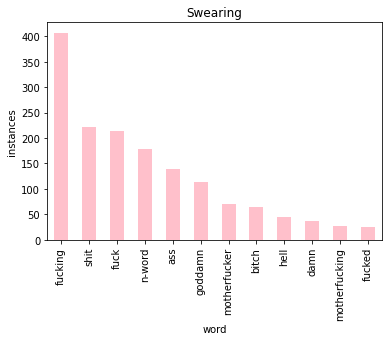

In [80]:
swearing = swears_df[swears_df.groupby('word')['word'].transform('size') > 15]
swearing['word'].value_counts().plot.bar(color='pink'); 
plt.title('Swearing')
plt.xlabel('word')
plt.ylabel('instances');

In [ ]:
# Frequency of swears (blue) vs frequency of deaths (orange)

<AxesSubplot:xlabel='Time'>

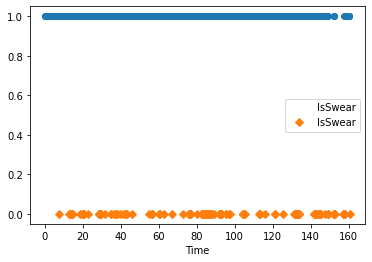

In [116]:
swear_times = [swears_df["swear_timestamp"]]
headers = ["Time"]
times_df = pd.concat(swear_times, axis = 1, keys=headers)
times_df["IsSwear"] = 1

death_times = [deaths_df["death_timestamp"]]
headers = ["Time"]
times2_df = pd.concat(death_times, axis = 1, keys=headers)
times2_df["IsSwear"] = 0

ax = times_df.plot(linestyle = 'None', marker = "o", label = "swears", x = "Time")
times2_df.plot(linestyle = 'None', marker = "D", label = "deaths", x = "Time", ax = ax)

<AxesSubplot:xlabel='Time'>

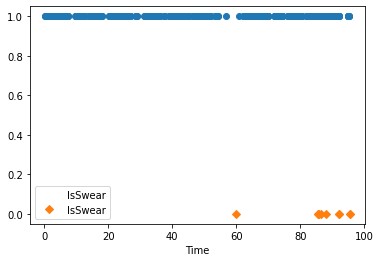

In [120]:
swears_one_movie = swears_df.loc[swears_df["movie_name"] == "Reservoir Dogs"]
swear_times = [swears_one_movie["swear_timestamp"]]
headers = ["Time"]
times_df = pd.concat(swear_times, axis = 1, keys=headers)
times_df["IsSwear"] = 1
times_df

deaths_one_movie = deaths_df.loc[deaths_df["movie_name"] == "Reservoir Dogs"]
death_times = [deaths_one_movie["death_timestamp"]]
headers = ["Time"]
times2_df = pd.concat(death_times, axis = 1, keys=headers)
times2_df["IsSwear"] = 0
times2_df

ax = times_df.plot(linestyle = 'None', marker = "o", label = "swears", x = "Time")
times2_df.plot(linestyle = 'None', marker = "D", label = "deaths", x = "Time", ax = ax)

<AxesSubplot:xlabel='Time'>

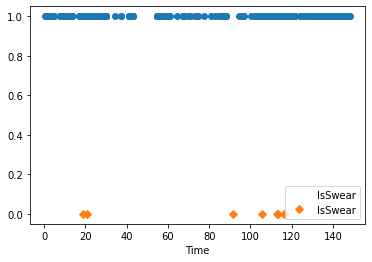

In [121]:
swears_one_movie = swears_df.loc[swears_df["movie_name"] == "Pulp Fiction"]
swear_times = [swears_one_movie["swear_timestamp"]]
headers = ["Time"]
times_df = pd.concat(swear_times, axis = 1, keys=headers)
times_df["IsSwear"] = 1
times_df

deaths_one_movie = deaths_df.loc[deaths_df["movie_name"] == "Pulp Fiction"]
death_times = [deaths_one_movie["death_timestamp"]]
headers = ["Time"]
times2_df = pd.concat(death_times, axis = 1, keys=headers)
times2_df["IsSwear"] = 0
times2_df

ax = times_df.plot(linestyle = 'None', marker = "o", label = "swears", x = "Time")
times2_df.plot(linestyle = 'None', marker = "D", label = "deaths", x = "Time", ax = ax)

<AxesSubplot:xlabel='Time'>

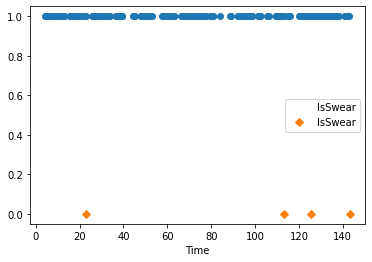

In [122]:
swears_one_movie = swears_df.loc[swears_df["movie_name"] == "Jackie Brown"]
swear_times = [swears_one_movie["swear_timestamp"]]
headers = ["Time"]
times_df = pd.concat(swear_times, axis = 1, keys=headers)
times_df["IsSwear"] = 1
times_df

deaths_one_movie = deaths_df.loc[deaths_df["movie_name"] == "Jackie Brown"]
death_times = [deaths_one_movie["death_timestamp"]]
headers = ["Time"]
times2_df = pd.concat(death_times, axis = 1, keys=headers)
times2_df["IsSwear"] = 0
times2_df

ax = times_df.plot(linestyle = 'None', marker = "o", label = "swears", x = "Time")
times2_df.plot(linestyle = 'None', marker = "D", label = "deaths", x = "Time", ax = ax)

In [ ]:
# Ratios of swears per movie (the number of swears decreases as the movies/years go up)

<AxesSubplot:>

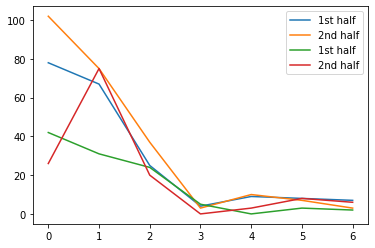

In [114]:
ax = adj_swears.plot()
expl_swears.plot(ax=ax)

In [ ]:
# In terms of visualization, I did struggle with this portion of the assignment, as a lot of
# my variables are text variables (movie_name for example), and so finding the right parameters for representing
# my data was rather difficult. Ultimately, I would have like to have combined my data frames in order to better 
# represent them, both statistically and visually. I think this could be a fun project to continue on
# in the future, and might actually try to continue with this data set as a part of my final project.
# I'd like to look more into how these variables change throughout the length of films, and their genres as well.
# Tarantino is an infamous name, and his works are so well known, that I thought this dataset would be the most 
# enjoyable approach to understanding databases better. However it was a lot more difficult than I thought!